In [62]:
import geopandas as gpd
import pandas as pd
import sqlite3
import os
import matplotlib.pyplot as plt

# Importando os bancos de dados

In [63]:
conn = sqlite3.connect(os.path.join('BancosA2.db'))

In [64]:
query= "SELECT * FROM pib"
pib_df = pd.read_sql(query,conn)
pib=pib_df.copy()
pib_df.head(2)

,index,gid,UF,nome,PIB,Pop_est_2009,PIB_percapita,geometry
0,0,215,BAHIA,Tremedal,57883.992,18433.0,3140.24,"MULTIPOLYGON (((-41.45880331 -14.78141546, -41..."
1,1,306,RIO GRANDE DO SUL,Turuçu,45723.875,4000.0,11430.97,"MULTIPOLYGON (((-52.03534993 -31.56750961, -52..."


In [65]:
query= "SELECT * FROM racial"
racial_df = pd.read_sql(query,conn)
racial_df=racial_df.copy()
racial_df.head(2)

,index,gid,UF,nome,POP_TOT,Pessoas_Pretas,PER_Pessoas_Pretas,geometry
0,0,215,BAHIA,Tremedal,17029.0,827,4.856421,"MULTIPOLYGON (((-41.45880331 -14.78141546, -41..."
1,1,306,RIO GRANDE DO SUL,Turuçu,3522.0,133,3.776264,"MULTIPOLYGON (((-52.03534993 -31.56750961, -52..."


Fechando a conexão após jogar toda a informação para DataFrames, então ja não iremos ter contato com o banco de dados.

In [66]:
conn.close()

### Transformando os DataFrames para o tipo GeoDataFrame

In [67]:
pib['geometry']=gpd.GeoSeries.from_wkt(pib_df['geometry'])
pib = gpd.GeoDataFrame(pib, geometry='geometry')
pib.head(2)

,index,gid,UF,nome,PIB,Pop_est_2009,PIB_percapita,geometry
0,0,215,BAHIA,Tremedal,57883.992,18433.0,3140.24,"MULTIPOLYGON (((-41.45880 -14.78142, -41.45497..."
1,1,306,RIO GRANDE DO SUL,Turuçu,45723.875,4000.0,11430.97,"MULTIPOLYGON (((-52.03535 -31.56751, -52.04061..."


In [68]:
racial['geometry']=gpd.GeoSeries.from_wkt(racial_df['geometry'])
racial = gpd.GeoDataFrame(racial, geometry='geometry')
racial.head(2)

,index,gid,UF,nome,POP_TOT,Pessoas_Pretas,PER_Pessoas_Pretas,geometry
3330,3330,1076,GOIÁS,Abadia De Goiás,6876.0,405,5.890052,"MULTIPOLYGON (((-49.44332 -16.72349, -49.44079..."
3492,3492,2687,MINAS GERAIS,Abadia Dos Dourados,6704.0,292,4.355608,"MULTIPOLYGON (((-47.42611 -18.16380, -47.42276..."


## Tratando os dados

In [69]:
pib = pib.sort_values('nome')
pib['nome'] = pib['nome'].str.title()
pib.head(5)

,index,gid,UF,nome,PIB,Pop_est_2009,PIB_percapita,geometry
4229,4229,254,SERGIPE,Arauá,63633.420,12042.0,5284.29,"MULTIPOLYGON (((-37.50771 -11.27151, -37.50658..."
3330,3330,1076,GOIÁS,Abadia De Goiás,38975.133,6301.0,6185.55,"MULTIPOLYGON (((-49.44332 -16.72349, -49.44079..."
3492,3492,2687,MINAS GERAIS,Abadia Dos Dourados,71222.170,6805.0,10466.15,"MULTIPOLYGON (((-47.42611 -18.16380, -47.42276..."
3976,3976,1077,GOIÁS,Abadiânia,82400.490,13378.0,6159.40,"MULTIPOLYGON (((-48.79594 -16.01553, -48.79546..."
2115,2115,2138,PARÁ,Abaetetuba,456256.940,139819.0,3263.20,"MULTIPOLYGON (((-48.80043 -1.60629, -48.79494 ..."


In [70]:
racial = racial.sort_values('nome')
racial['nome'] = racial['nome'].str.title()
racial.head(5)

,index,gid,UF,nome,POP_TOT,Pessoas_Pretas,PER_Pessoas_Pretas,geometry
3330,3330,1076,GOIÁS,Abadia De Goiás,6876.0,405,5.890052,"MULTIPOLYGON (((-49.44332 -16.72349, -49.44079..."
3492,3492,2687,MINAS GERAIS,Abadia Dos Dourados,6704.0,292,4.355608,"MULTIPOLYGON (((-47.42611 -18.16380, -47.42276..."
3976,3976,1077,GOIÁS,Abadiânia,15757.0,664,4.214000,"MULTIPOLYGON (((-48.79594 -16.01553, -48.79546..."
2115,2115,2138,PARÁ,Abaetetuba,141100.0,9038,6.405386,"MULTIPOLYGON (((-48.80043 -1.60629, -48.79494 ..."
1480,1480,2688,MINAS GERAIS,Abaeté,22690.0,1522,6.707801,"MULTIPOLYGON (((-45.09781 -19.06241, -45.09646..."


### Unindo os Dataframes sobre o PIB e a população negra

In [71]:
racial_dfn = racial_df.drop(racial_df.columns[[0,2,3,7]], axis=1) #retirando colunas iguais
merge = pd.merge(pib_df, racial_dfn, how='outer', on='gid')

In [72]:
merge.head(2)

,index,gid,UF,nome,PIB,Pop_est_2009,PIB_percapita,geometry,POP_TOT,Pessoas_Pretas,PER_Pessoas_Pretas
0,0,215,BAHIA,Tremedal,57883.992,18433.0,3140.24,"MULTIPOLYGON (((-41.45880331 -14.78141546, -41...",17029.0,827,4.856421
1,1,306,RIO GRANDE DO SUL,Turuçu,45723.875,4000.0,11430.97,"MULTIPOLYGON (((-52.03534993 -31.56750961, -52...",3522.0,133,3.776264


Transformando em GeoDataFrame

In [73]:
merge['geometry']=gpd.GeoSeries.from_wkt(merge['geometry'])
merge = gpd.GeoDataFrame(merge, geometry='geometry')
merge.head(1)

,index,gid,UF,nome,PIB,Pop_est_2009,PIB_percapita,geometry,POP_TOT,Pessoas_Pretas,PER_Pessoas_Pretas
0,0,215,BAHIA,Tremedal,57883.992,18433.0,3140.24,"MULTIPOLYGON (((-41.45880 -14.78142, -41.45497...",17029.0,827,4.856421


## Analisando os dados

In [74]:
merge['PIB_percapita'] = merge['PIB_percapita'].astype(float)
merge['Pop_est_2009'] = merge['Pop_est_2009'].astype(float)
merge['Pessoas_Pretas'] = merge['Pessoas_Pretas'].astype(float)
merge['PER_Pessoas_Pretas'] = merge['PER_Pessoas_Pretas'].astype(float)
merge['UF'] = merge['UF'].astype(str)

In [75]:
merge[['PIB', 'Pop_est_2009', 'PIB_percapita', 'PER_Pessoas_Pretas']].agg(['mean', 'median'])

,PIB,Pop_est_2009,PIB_percapita,PER_Pessoas_Pretas
mean,582020.311889,34405.572763,10977.027145,6.410117
median,80591.720000,11203.000000,8393.170000,5.175179


   <p style="text-align: justify">Inicialmente, foram feitas análises, como as seguintes, a fim de relacionar o PIB per capita de cada município com a sua população. O resultado esperado era que a população e o PIB per capita fossem diretamente relacionados, ou seja, quanto maior a população do município, maior seria o PIB per capita. Entretanto, como pode ser visto a partir das visualizações seguintes, não é possível concluir isso, pois apesar de ser verdade em algumas regiões, em outras não há essa relação.</p>
   <p style="text-align: justify">Começamos a análise pelo Brasil todo, porém dessa forma a visualização ficou muito difícil, então começamos a fazer as visualizações por estados e regiões.</p>

Text(0.5, 1.0, 'População de cada município do Brasil')

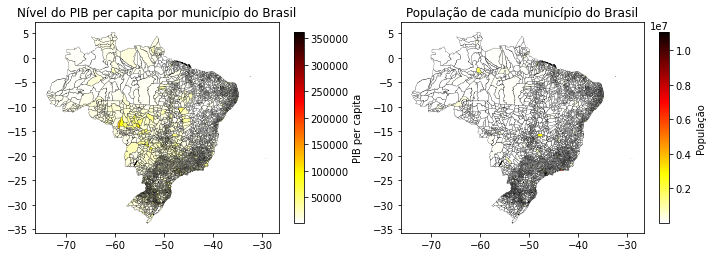

In [76]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
merge.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita", 'shrink': 0.7})
plt.title('Nível do PIB per capita por município do Brasil') 

ax=f.add_subplot(122)
merge.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.7})
plt.title('População de cada município do Brasil')

In [77]:
am = merge[merge['UF'] == 'AMAZONAS']

Text(0.5, 1.0, 'População de cada município do Amazonas')

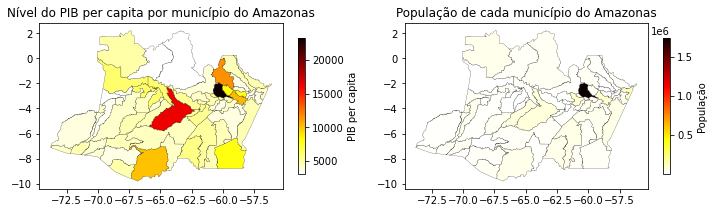

In [78]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
am.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita", 'shrink': 0.5})
plt.title('Nível do PIB per capita por município do Amazonas') 

ax=f.add_subplot(122)
am.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.5})
plt.title('População de cada município do Amazonas')

In [79]:
se = merge[merge['UF'] == 'SERGIPE']

Text(0.5, 1.0, 'População de cada município de Sergipe')

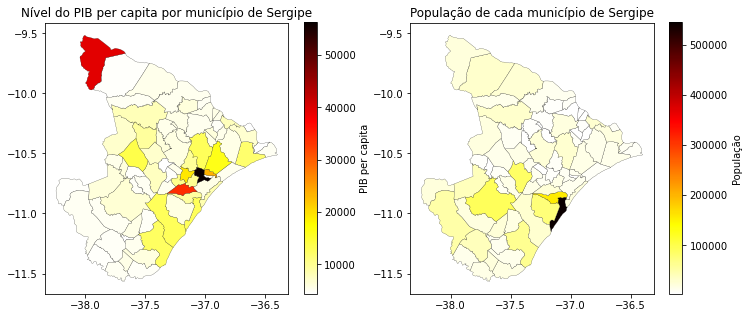

In [80]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
se.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita"})
plt.title('Nível do PIB per capita por município de Sergipe') 

ax=f.add_subplot(122)
se.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População"})
plt.title('População de cada município de Sergipe')

In [81]:
es = merge[merge['UF'] == 'ESPIRITO SANTO']

Text(0.5, 1.0, 'População de cada município do Espiríto Santo')

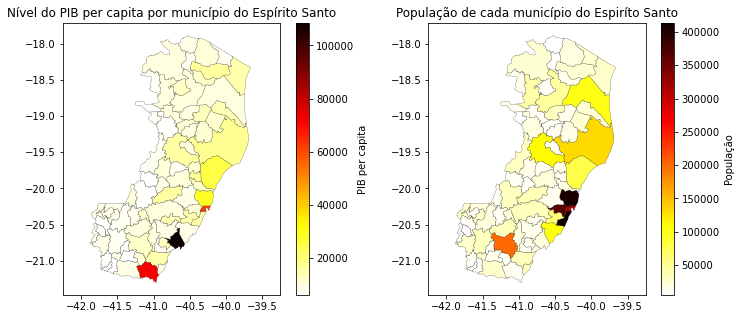

In [82]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
es.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita"})
plt.xlim(-42.25,-39.25)
plt.title('Nível do PIB per capita por município do Espírito Santo') 

ax=f.add_subplot(122)
es.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População"})
plt.xlim(-42.25,-39.25)
plt.title('População de cada município do Espiríto Santo')

In [83]:
go = merge[merge['UF'] == 'GOIÁS']

Text(0.5, 1.0, 'População de cada município de Goiás')

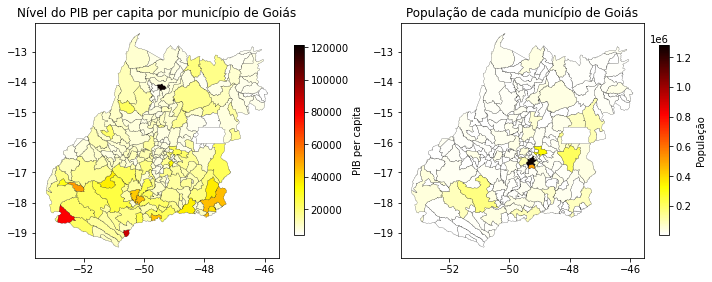

In [84]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
go.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita", 'shrink': 0.7})
plt.title('Nível do PIB per capita por município de Goiás')

ax=f.add_subplot(122)
go.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.7})
plt.title('População de cada município de Goiás')

In [85]:
merge[['PIB', 'Pop_est_2009', 'PIB_percapita', 'PER_Pessoas_Pretas']].agg(['mean', 'median'])

,PIB,Pop_est_2009,PIB_percapita,PER_Pessoas_Pretas
mean,582020.311889,34405.572763,10977.027145,6.410117
median,80591.720000,11203.000000,8393.170000,5.175179


Por fim, como última análise entre essas duas variáveis, separamos os municípios entre os que estavam acima da população média brasileira e/ou do PIB per capita médio, dos que estavam abaixo para visualizar onde se concentram cada um deles.

Assim, podemos perceber que os municípios com alto PIB per capita se concentram nas regiões sul e centro-oeste, enquanto os municípios com alta concentração populacional, apesar de bem distribuídos, se encontram fora da região central do país.

In [86]:
br_a1 = merge[merge['PIB_percapita'] < 10977.027145] #PIB per capita abaixo da média
br_a2 = merge[merge['PIB_percapita'] >= 10977.027145] #PIB per capita acima da média
br_a3 = merge[merge['Pop_est_2009'] < 34405.572763] #População abaixo da média
br_a4 = merge[merge['Pop_est_2009'] >= 34405.572763] #População acima da média

<AxesSubplot:>

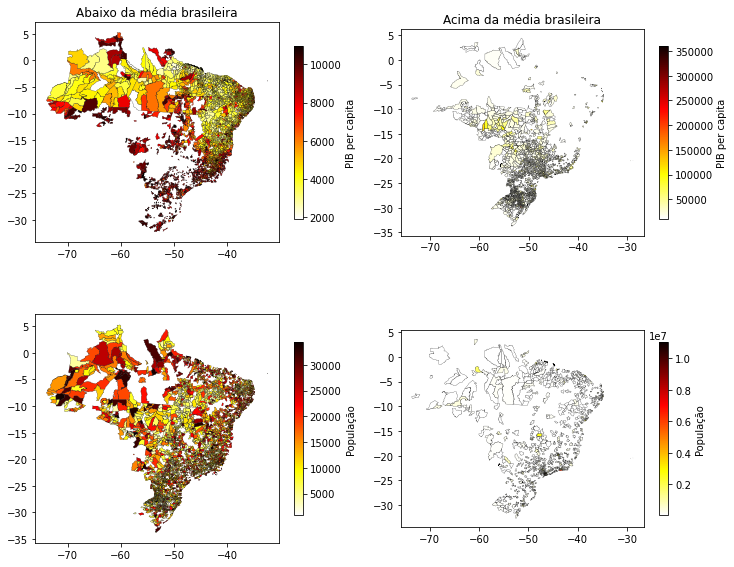

In [87]:
f = plt.figure(figsize=(12,10))

ax=f.add_subplot(221)
br_a1.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita", 'shrink': 0.7})
plt.title('Abaixo da média brasileira')

ax=f.add_subplot(222)
br_a2.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black',linewidth=0.2,  figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita", 'shrink': 0.7})
plt.title('Acima da média brasileira')

ax=f.add_subplot(223)
br_a3.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.7})

ax=f.add_subplot(224)
br_a4.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.7})

Como não conseguimos encontrar nenhuma relação entre a concentração populacional dos municípios e o PIB per capita de cada um deles, a partir desse momento, começamos a fazer relações para ver se a porcentagem de pessoas negras na população dos municípios tem influência no PIB per capita dos municípios.

Na visualização seguinte, separamos os municípios que estão abaixo e acima da porcentagem média de população negra por município do Brasil. Conseguimos perceber que a região sul concentra os municípios que possuem uma pequena porcentagem, enquanto as regiões nordeste e sudeste concentram os municípios que possuem grande porcentagem.

In [90]:
br_a1 = merge[merge['PIB_percapita'] < 10977.027145] #PIB per capita abaixo da média
br_a2 = merge[merge['PIB_percapita'] >= 10977.027145] #PIB per capita acima da média
br_a3 = merge[merge['Pop_est_2009'] < 34405.572763] #População abaixo da média
br_a4 = merge[merge['Pop_est_2009'] >= 34405.572763] #População acima da média
br_a5 = merge[merge['PER_Pessoas_Pretas'] < 6.410117] #Porcentagem de população negra abaixo da média
br_a6 = merge[merge['PER_Pessoas_Pretas'] >= 6.410117] #Porcentagem de população negra acima da média

Text(0.5, 1.0, 'Acima da média brasileira')

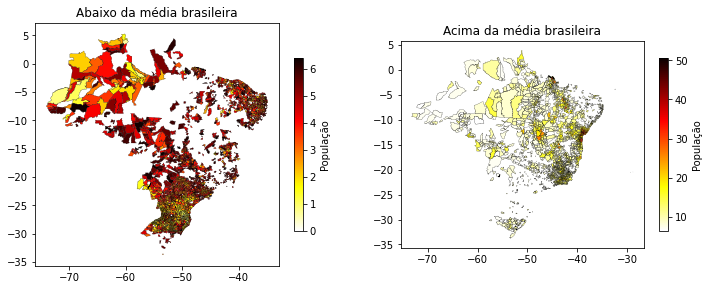

In [91]:
f = plt.figure(figsize=(12,10))

ax=f.add_subplot(221)
br_a5.plot(column='PER_Pessoas_Pretas', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.7})
plt.title('Abaixo da média brasileira')

ax=f.add_subplot(222)
br_a6.plot(column='PER_Pessoas_Pretas', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.7})
plt.title('Acima da média brasileira')

A partir disso, fizemos algumas visualizações para analisar a relação da porcentagem de população negra com o PIB per capita nas regiões sul e nordeste.

In [92]:
nordeste = merge[merge['UF'].isin(['SERGIPE', 'CEARÁ', 'BAHIA', 'PERNAMBUCO', 'RIO GRANDE DO NORTE', 'PIAUÍ', 'MARANHÃO', 'PARAÍBA', 'ALAGOAS'])]
sul = merge[merge['UF'].isin(['SANTA CATARINA', 'PARANÁ', 'RIO GRANDE DO SUL'])]

Text(0.5, 1.0, 'População negra de cada município de SC (%)')

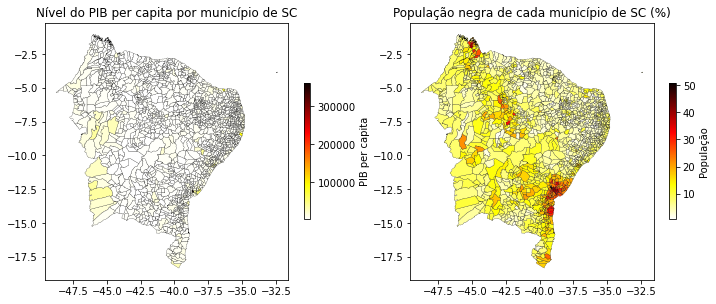

In [93]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
nordeste.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita", 'shrink': 0.5})
plt.title('Nível do PIB per capita por município de SC') 

ax=f.add_subplot(122)
nordeste.plot(column='PER_Pessoas_Pretas', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.5})
plt.title('População negra de cada município de SC (%)')

Text(0.5, 1.0, 'População negra de cada município de SC (%)')

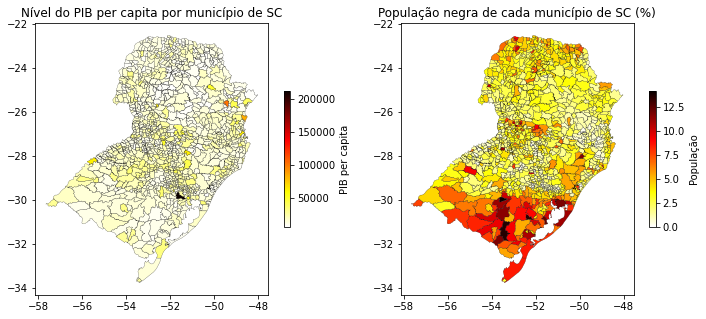

In [94]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sul.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita", 'shrink': 0.5})
plt.title('Nível do PIB per capita por município de SC') 

ax=f.add_subplot(122)
sul.plot(column='PER_Pessoas_Pretas', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.5})
plt.title('População negra de cada município de SC (%)')

Entretanto, não foi possível observar nenhuma relação e decidimos fazer visualizações em um estado de cada região, Bahia e Santa Catarina.

In [95]:
ba = merge[merge['UF'].isin(['BAHIA'])]

Text(0.5, 1.0, 'População negra de cada município da Bahia (%)')

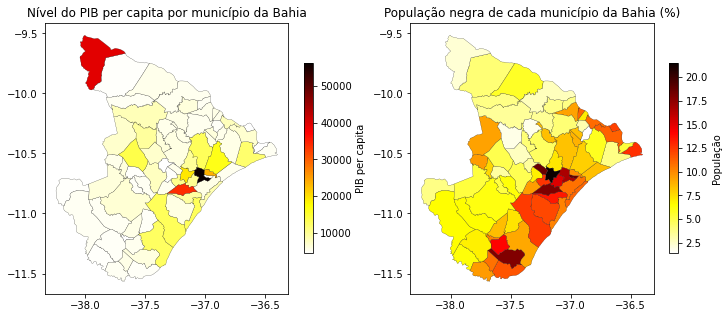

In [96]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
se.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita", 'shrink': 0.7})
plt.title('Nível do PIB per capita por município da Bahia') 

ax=f.add_subplot(122)
se.plot(column='PER_Pessoas_Pretas', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.7})
plt.title('População negra de cada município da Bahia (%)')

In [97]:
sc = merge[merge['UF'].isin(['SANTA CATARINA'])]

Text(0.5, 1.0, 'População negra de cada município de SC (%)')

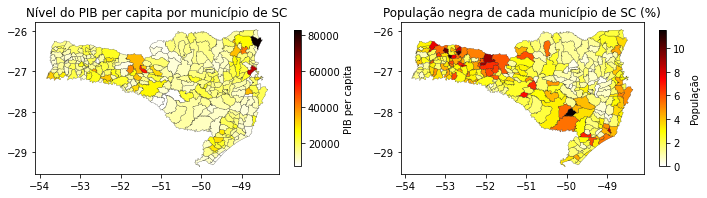

In [98]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sc.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita", 'shrink': 0.5})
plt.title('Nível do PIB per capita por município de SC') 

ax=f.add_subplot(122)
sc.plot(column='PER_Pessoas_Pretas', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.5})
plt.title('População negra de cada município de SC (%)')

Assim, concluímos que não há nenhuma relação entre a concentração populacional e o PIB per capita nem entre a porcentagem de pessoas negras com o PIB per capita.